In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
df_train = pd.read_excel('C:/Users/d.savchenko/python/obolon_pred/files/obolon.xlsx') 
df_test = pd.read_excel('C:/Users/d.savchenko/python/obolon_pred/files/test.xlsx')

In [16]:
#df_test

In [17]:
df_train.fillna(0, inplace=True)
#df_train

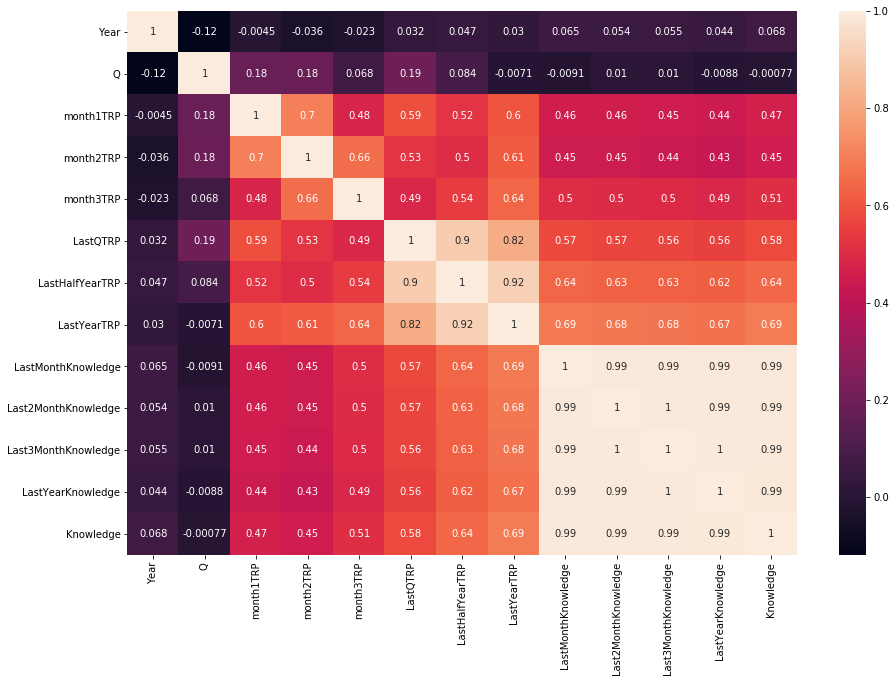

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [19]:
#df_train

In [20]:
#for dataset in [df_train, df_test]:
   # dataset['YearQBrand'] = str(dataset['Year'])  + dataset['Brand']
    #if dataset['Q'] > 1: 
    #    dataset['Last2MonthKnowledge'] = dataset[dataset['Q']-1]['Knowledge']
    #else:
        #dataset['Last2MonthKnowledge'] = dataset[dataset['Q']==4]['Knowledge']
#df_train

In [21]:
#for dataset in [df_train, df_test]:
#    dataset['Brand'] = dataset['Brand'].map({'Оболонь': 0, 'Живчик': 1, 'Львівське': 2,
 #                                            'Чернігівське': 3,'Tuborg': 4,'Арсенал': 5,
 #                                            'Bud': 6,'Hike': 7,'Fanta': 8,'Coca-Cola': 9,
 #                                            'Schweppes': 9,'Биола': 9}).astype('int')
 #   dataset['segment'] = dataset['segment'].map({'ЖИВЧИК': 0, 'PREMIUM+': 1, 'MAINSTREAM': 2}).astype('int')
 #   dataset.drop(['Brand','segment'], axis=1, inplace=True)
    
    


In [22]:
#дает чуть хуже результат, но не требует всех брендов в тестовом файле
df_train = pd.concat([df_train, pd.get_dummies(df_train['Brand'],prefix="Brand"),
                      pd.get_dummies(df_train['segment'], prefix="segment")], axis=1)
df_train.drop(['Brand','segment'], axis=1, inplace=True)


df_test = pd.concat([df_test, pd.get_dummies(df_test['Brand'],prefix="Brand"),
                    pd.get_dummies(df_test['segment'],prefix="segment")], axis=1)
df_test.drop(['Brand','segment' ], axis=1, inplace=True)

In [23]:
X = df_train.drop('Knowledge', axis=1)
y = df_train['Knowledge']

In [24]:
X.shape, y.shape

((252, 27), (252,))

In [25]:
#df_train

In [26]:
#1ый способ(не совсем коректный)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=17)

In [27]:
#2ой способ, правильній
#X_train = X[:int(X.shape[0]*0.7)]
#X_valid = X[int(X.shape[0]*0.7):]
#y_train = X[:int(X.shape[0]*0.7)]
#y_valid = X[int(X.shape[0]*0.7):]
X_valid.shape, X_train.shape, y_valid.shape, y_train.shape

((76, 27), (176, 27), (76,), (176,))

In [28]:
df_test.shape
#X_valid.columns

(22, 27)

In [29]:
#df_test.columns

In [30]:
#first_tree = DecisionTreeClassifier(max_depth=4,  random_state=17)
#np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))
#from sklearn.ensemble import GradientBoostingClassifier

#first_xgboost = GradientBoostingClassifier(random_state=17)
#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
first_xgboost = GradientBoostingRegressor(random_state=17, loss = 'ls', criterion= 'friedman_mse')

In [33]:
xgboost_params = {'learning_rate': [0.05, 0.01], 'min_samples_leaf': [1],  'max_depth': [2, 3, 4, 5], 'n_estimators': [50, 80, 90, 100, 300 ]}


In [34]:
#еще можно через RandomizedSearchCV, hyperopt
xgboost_grid = GridSearchCV(first_xgboost, xgboost_params, cv=7, n_jobs=-1)



In [35]:
%%time
xgboost_grid.fit(X_train, y_train)

Wall time: 7.01 s


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=17, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.05, 0.01], 'min_samples_leaf': [1], 'max_depth': [2, 3, 4, 5], 'n_estimators': [50, 80, 90, 100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
xgboost_grid.best_score_, xgboost_grid.best_params_

(0.9840893228753462,
 {'learning_rate': 0.05,
  'max_depth': 2,
  'min_samples_leaf': 1,
  'n_estimators': 100})

In [37]:
xgboost_grid.best_estimator_ 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=17, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
xgboost_valid_pred = xgboost_grid.predict(X_valid)

In [39]:
print(xgboost_valid_pred)

[856.63796394 318.77994517 502.39346254 838.59576548 493.07765281
 930.2622697  490.5000625  926.49424412 900.5940959  318.77994517
 387.4707213  704.8084889  503.97934334 497.40256051 373.76219976
 820.25903132 497.10923962 840.75613667 426.26879115 501.13781316
 500.67684002 431.69408569 822.25404828 413.42890699 823.30289308
 871.96741286 808.09829898 401.64214006 498.56022285 917.60236606
 428.05286487 857.42558976 746.91403986 406.70070217 391.86945639
 944.13483918 491.82200342 870.72301337 729.63448522 885.69477642
 933.86663937 496.64525321 365.20372548 366.6764565  321.30553466
 919.187957   894.71370328 417.19630653 935.66665908 713.59313596
 401.64214006 461.13570572 537.31119209 822.25404828 385.06545686
 431.38833791 762.63456741 467.632992   429.04914032 398.49125358
 891.25583373 842.87227893 668.6196399  731.45801752 688.96333074
 779.883961   712.48877738 463.0311308  811.32906162 717.426548
 917.89080109 387.03862365 926.77688054 894.02891081 392.58702591
 383.6246810

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 

mean_squared_error(y_valid, xgboost_valid_pred)


312.74119382040027

In [41]:
((abs(y_valid - xgboost_valid_pred)/y_valid)*100).mean()

2.6233720705348307

In [42]:
#df_test["xgboost"] = xgboost_valid_pred
#dfresult["xgboost"] = xgboost_valid_pred

#dfresult2 = xgboost_valid_pred

#display(y_valid)
for i in y_valid:
    print(i)


#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
  #  print(y_valid)
    


855
369
485
856
482
928
496
936
890
296
392
680
538
465
391
824
480
821
436
521
499
423
844
391
823
868
799
408
478
918
449
830
756
427
377
942
481
863
738
899
938
474
366
360
304
919
906
398
925
718
393
486
529
842
391
415
730
481
440
425
903
856
703
745
698
786
718
462
830
719
915
397
983
903
413
361


In [43]:
for i in xgboost_valid_pred:
    print(i)

856.6379639427525
318.7799451700535
502.3934625425294
838.5957654806422
493.07765280832984
930.2622696959685
490.500062504239
926.4942441162373
900.5940958986779
318.7799451700535
387.4707212981042
704.8084888997546
503.9793433446339
497.40256050839986
373.7621997566233
820.2590313169278
497.1092396215288
840.7561366679837
426.26879114934667
501.1378131590666
500.6768400190038
431.69408568575074
822.2540482820643
413.42890699315564
823.3028930805764
871.9674128571902
808.0982989797525
401.6421400640472
498.56022285497585
917.6023660557482
428.0528648744078
857.4255897564026
746.9140398575234
406.7007021675143
391.8694563858158
944.13483918275
491.82200342486703
870.7230133669008
729.6344852159874
885.6947764229465
933.8666393699859
496.64525320580486
365.2037254843202
366.67645649868376
321.305534659133
919.1879570041017
894.7137032773622
417.1963065347093
935.6666590809646
713.5931359597228
401.6421400640472
461.1357057204775
537.3111920913205
822.2540482820643
385.06545685514453
431.

In [44]:
#dfresult.to_excel('C:/Users/d.savchenko/python/obolon_pred/files/final.xlsx')
#dfresult2.to_excel('C:/Users/d.savchenko/python/obolon_pred/files/final2.xlsx')


In [45]:
xgboost_valid_pred = xgboost_grid.predict(df_test)

In [46]:
print(xgboost_valid_pred)

[338.84274289 328.25477732 331.93119197 320.23429099 322.75988048
 322.75988048 321.30553466 335.0833899  330.47684614 318.77994517
 321.30553466 321.30553466 321.30553466 321.30553466 321.30553466
 321.30553466 321.30553466 321.30553466 321.30553466 321.30553466
 321.30553466 321.30553466]


In [47]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)


-5100.678051138682
[ 2.58699480e+00 -5.76749736e-01  3.96720083e-03  1.25174559e-03
  3.67849554e-03  1.16104937e-03  1.86214384e-03 -1.35248054e-03
  4.30811391e-01  2.69284003e-01  6.63215032e-02  5.34175571e-02
 -6.14073507e+00  3.47955234e+01  4.50322768e+00 -2.08469357e+01
 -3.88618604e+01  2.96956175e+00 -5.42174348e+01 -2.16479070e+00
  1.47458262e+01  1.44919945e+01  2.86798736e+01  2.20457495e+01
  1.10001828e+01 -2.40181090e+01  1.30179262e+01]


In [49]:
lm_valid_pred = lm.predict(X_valid)

In [50]:
((abs(y_valid - lm_valid_pred)/y_valid)*100).mean()

2.3497351975902587

In [51]:
lm_valid_pred = lm.predict(df_test)

In [52]:
print(lm_valid_pred)

[649.49602282 231.88782262 229.02215213 225.75591727 228.07849672
 227.53540567 217.50594377 220.94742012 217.58105139 214.31481653
 216.63739598 216.09430493 215.59139412 225.16289246 169.05066949
 148.8997081  196.97640786 182.27020724 207.6203706  237.91266633
 164.25528251 200.95235223]


In [53]:
EN = ElasticNet(alpha=0.001)
EN.fit(X_train, y_train)
print(EN.intercept_)
print(EN.coef_)


-4362.508621921122
[ 2.20858138e+00 -6.60180739e-01  3.78717501e-03  1.58261243e-03
  3.64726116e-03  1.15638758e-03  1.83067294e-03 -1.20869687e-03
  4.37992299e-01  2.78921122e-01  7.67056309e-02  6.53269570e-02
 -3.97386116e+00  2.46180631e+01  4.56071370e+00 -1.66421513e+01
 -2.79325602e+01  2.62751906e+00 -3.98092580e+01 -2.15702706e+00
  1.02139534e+01  1.14232922e+01  2.03769676e+01  1.48242966e+01
  7.46352359e+00 -1.81966603e+01  9.39350465e+00]


C:\Users\d.savchenko\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [54]:
EN_valid_pred = EN.predict(X_valid)

In [55]:
((abs(y_valid - EN_valid_pred)/y_valid)*100).mean()

2.3462417449951842

In [56]:
for i in EN_valid_pred:
    print(i)

858.2590547755253
321.6651335470606
488.30548547006583
851.6174398418098
490.5006113994323
927.4999952301332
478.7713279482359
931.8759596124746
895.0476214861301
317.217757200875
382.6705802202323
694.8333414003428
504.29889713612283
489.8402424380665
372.80068019106056
828.9699274229479
498.4953109635071
857.7827829903799
427.1954005572097
522.9758764253011
483.3744023976333
448.74775073941964
818.4870984785302
389.47781417307397
819.4436975596955
854.197021512904
787.6514916187043
406.3424601951392
499.22496446690275
910.606337978289
430.26248754057906
855.1780894611911
751.5683446278654
397.2328105931265
377.58507902655947
929.9731228726478
489.1056312468163
865.8543370406533
726.3152303354245
900.7964000795919
927.8953584981327
483.3816490328454
354.6789495941939
359.816046648516
313.8801034547523
925.7125712503284
892.1128338438621
401.7681439162352
935.5653297179924
711.5007168124293
392.0804026327078
454.0205717071367
516.6912151526512
819.0731528112719
387.34007029579334
431.0

In [57]:
EN_valid_pred = EN.predict(df_test)

In [58]:
print(EN_valid_pred)

[600.17525487 199.00538324 196.32014849 192.83771908 195.08204132
 194.6411288  187.18829421 190.74691001 187.42863029 183.94620089
 186.19052312 185.74961061 186.76774144 192.0987269  152.31178442
 137.46517235 173.30056918 160.63227905 181.83514405 201.89249341
 149.3418701  175.11740329]


In [59]:
#dfresult3 = EN_valid_pred

In [60]:
#dfresult3.to_excel('C:/Users/d.savchenko/python/obolon_pred/files/final3.xlsx')